In [1]:
# Packages for Data Analysis
import numpy as np
import pandas as pd

from sklearn import svm

# Visualize your Data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

# Allows charts to appear in notebook
%matplotlib inline

# Package pickle
import pickle

In [2]:
# Make Our Own Dataset
data = [["Type","Flour","Milk","Sugar","Butter","Egg","Baking Powder","Vanilla","Salt"],
       ["Muffin",55,28,3,7,5,2,0,0],
       ["Muffin",47,24,12,6,9,1,0,0],
       ["Muffin",47,23,18,6,4,1,0,0],
       ["Muffin",45,11,17,17,8,1,0,0],
       ["Muffin",50,25,12,6,5,2,1,0],
       ["Muffin",50,17,17,11,4,1,0,0],
       ["Cupcake",39,0,26,19,14,1,1,0],
       ["Cupcake",42,21,16,10,8,3,0,0],
       ["Cupcake",34,17,20,20,5,2,1,0],
       ["Cupcake",39,13,17,19,10,1,1,0],
       ["Cupcake",38,15,23,15,8,0,1,0],
       ["Cupcake",42,18,25,9,5,1,0,0],
       ["Cupcake",36,14,21,14,11,2,1,0],
       ["Cupcake",38,15,31,8,6,1,1,0],
       ["Cupcake",36,16,24,12,9,1,1,0],
       ["Cupcake",34,17,23,11,13,0,1,0]]

In [3]:
df = pd.DataFrame(data[1:], columns=data[0])
df.to_csv("recipes.csv", index=False)

In [4]:
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


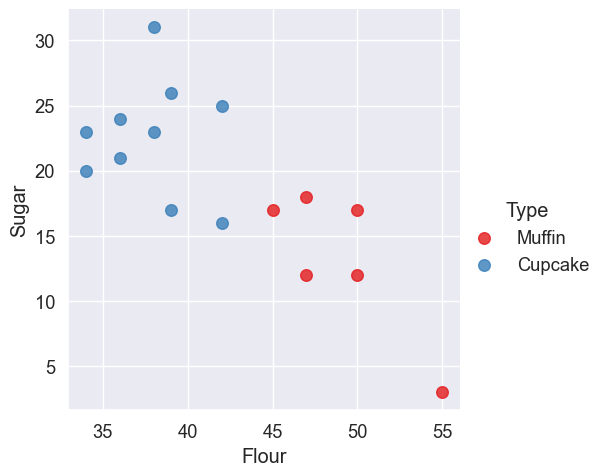

In [5]:
# Plot our data
sns.lmplot(data=df,x="Flour",y="Sugar",hue="Type",palette="Set1",fit_reg=False,scatter_kws={"s":70});
plt.show()

In [6]:
# Format or Preprocess our data

type_label = np.where(df["Type"] == "Muffin", 0, 1)
recipe_features = df.columns.values[1:].tolist()
print(recipe_features)
ingredients = df[["Flour","Sugar"]].values
print(ingredients)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [7]:
# fit model
model = svm.SVC(kernel="linear")
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [12]:
# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallel to the separating hyperplane the pass trough the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

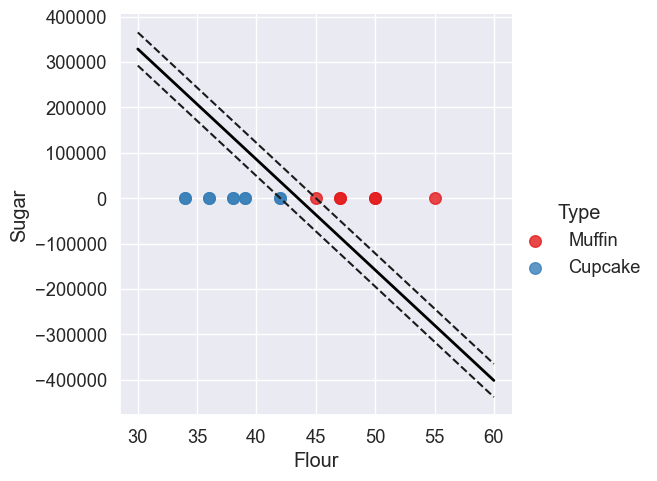

In [16]:
sns.lmplot(data=df,x="Flour",y="Sugar",hue="Type",palette="Set1",fit_reg=False,scatter_kws={"s":70});
plt.plot(xx, yy , linewidth = 2, color = "black")
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()

In [18]:
# Create a function to predict muffin or cupcake
def muffin_or_cupcake(flour, sugar):
    if (model.predict([[flour, sugar]]) == 0):
        print("You are looking at a muffin recipe.")
    else:
        print("You are looking at a cupcake recipe.")

# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You are looking at a muffin recipe.


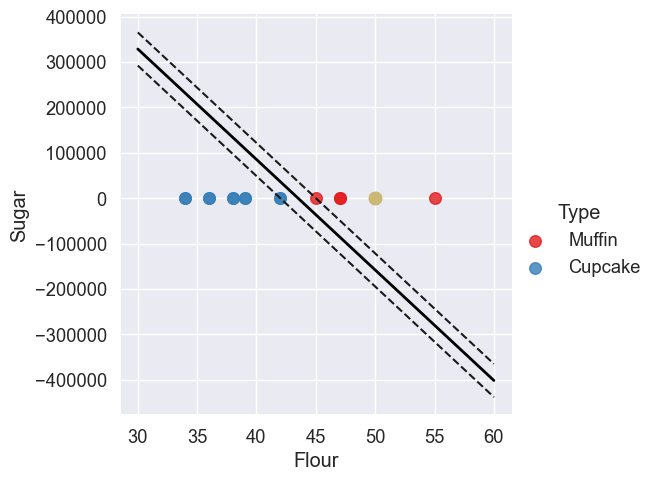

In [20]:
# lets plot it on the graph
sns.lmplot(data=df,x="Flour",y="Sugar",hue="Type",palette="Set1",fit_reg=False,scatter_kws={"s":70});
plt.plot(xx, yy , linewidth = 2, color = "black")
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.plot(50, 20, "yo", markersize = "9")
plt.show()